In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split




In [161]:
df = pd.read_csv('./DATASET.csv')
df

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,...,Unnamed: 41,center,environment,classification,neighbors,number_of_neighbors,classification2,classification3,Center_Z,Weighted_EN
0,ABAYIO_clean,11.39486,4.32260,11.27409,0.949126,1428.73,1505.310,409.494,431.444,0.6636,...,NaN,Mn,"(5, 'Cl', 1, 'O', 4)",Mn_5_Cl_1_O_4,"Cl,O",5.0,"Mn_Cl,O_5.0",Mn_5.0,25,3.3840
1,ABAYOU_clean,11.27344,4.51080,11.27344,0.979267,1463.42,1494.400,419.062,427.935,0.6638,...,NaN,Co,"(5, 'Cl', 1, 'O', 4)",Co_5_Cl_1_O_4,"Cl,O",5.0,"Co_Cl,O_5.0",Co_5.0,27,3.3840
2,ABEFUL_clean,4.93969,3.32948,4.93889,1.551080,418.49,269.806,0.000,0.000,0.4118,...,NaN,Tb,"(8, 'O', 8)",Tb_8_O_8,O,8.0,Tb_O_8.0,Tb_8.0,65,3.4400
3,ABESUX_clean,5.87931,4.42492,5.57015,3.742910,1747.69,466.934,0.000,0.000,0.5646,...,NaN,U,"(5, 'O', 5)",U_5_O_5,O,5.0,U_O_5.0,U_5.0,92,3.4400
4,ABETAE_clean,5.88295,4.42033,5.88295,3.699280,1821.75,492.461,0.000,0.000,0.5720,...,NaN,U,"(5, 'O', 5)",U_5_O_5,O,5.0,U_O_5.0,U_5.0,92,3.4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,ZOQTIK_clean,8.17476,4.78997,8.17413,2.268360,1524.97,672.282,0.000,0.000,0.5810,...,NaN,Zn,"(4, 'I', 1, 'N', 2, 'Zn', 1)",Zn_4_I_1_N_2_Zn_1,"I,N,Zn",4.0,"Zn_I,N,Zn_4.0",Zn_4.0,30,2.5975
8758,ZOXNAD_clean,4.87739,3.47832,4.87739,1.376690,1540.35,1118.880,0.000,0.000,0.5810,...,NaN,Ca,"(5, 'O', 5)",Ca_5_O_5,O,5.0,Ca_O_5.0,Ca_5.0,20,3.4400
8759,ZULNAX_clean,10.24528,4.96374,10.20458,1.325340,1711.83,1291.610,0.000,0.000,0.6276,...,NaN,Zn,"(5, 'N', 5)",Zn_5_N_5,N,5.0,Zn_N_5.0,Zn_5.0,30,3.0400
8760,ZUQBUK_clean,6.60273,3.87772,6.60273,0.987073,2004.83,2031.090,0.000,0.000,0.5800,...,NaN,Fe,"(6, 'N', 6)",Fe_6_N_6,N,6.0,Fe_N_6.0,Fe_6.0,26,3.0400


In [ ]:

X = df[['number_of_neighbors', 'Center_Z', 'Weighted_EN']].values  
y = df['ASA_m2_cm3'].values           

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=(1/3), random_state=42
)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (7447, 3), (7447,)
Validation shape: (876, 3), (876,)
Test shape: (439, 3), (439,)


In [163]:
y_train

array([1386.6  ,  831.129,  706.487, ...,  852.75 , 1543.72 , 2122.45 ])

In [164]:
X_train

array([[ 5.        , 29.        ,  2.944     ],
       [ 4.        , 48.        ,  2.58      ],
       [ 7.        , 38.        ,  3.44      ],
       ...,
       [ 6.        , 49.        ,  3.44      ],
       [ 6.        , 25.        ,  3.30666667],
       [ 4.        , 29.        ,  3.44      ]])

In [165]:
import numpy as np

print(np.isnan(X_train).sum(), np.isnan(y_train).sum())
print(np.isinf(X_train).sum(), np.isinf(y_train).sum())


0 0
0 0


from sklearn.preprocessing import StandardScaler

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Scale target
scaler_y = StandardScaler()
y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_val_scaled = scaler_y.transform(y_val_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)


In [166]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(128,activation= 'relu'),
    layers.Dropout(0.2),
    layers.Dense(32,activation= 'relu'),
    layers.Dropout(0.2),
    layers.Dense(16,activation= 'relu'),
    layers.Dense(1)
])


In [167]:
model.compile(
    optimizer='adam',loss = 'mean_squared_error',
    metrics=['mean_absolute_error']
)

In [168]:
lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                 factor=0.5, 
                                                 patience=10, 
                                                 verbose=1)

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    batch_size=32,
    callbacks=[lr_reduction]
)


Train on 7447 samples, validate on 876 samples
Epoch 1/50
7447/7447 [==============================] - 1s 191us/sample - loss: 1480237.6738 - mean_absolute_error: 1026.3835 - val_loss: 668806.4907 - val_mean_absolute_error: 677.9472
Epoch 2/50
7447/7447 [==============================] - 1s 100us/sample - loss: 636745.2749 - mean_absolute_error: 655.5207 - val_loss: 576979.2203 - val_mean_absolute_error: 630.4085
Epoch 3/50
7447/7447 [==============================] - 1s 96us/sample - loss: 539405.8055 - mean_absolute_error: 601.1369 - val_loss: 484918.7851 - val_mean_absolute_error: 572.3357
Epoch 4/50
7447/7447 [==============================] - 1s 98us/sample - loss: 479599.7667 - mean_absolute_error: 566.4625 - val_loss: 448520.4834 - val_mean_absolute_error: 549.6859
Epoch 5/50
7447/7447 [==============================] - 1s 96us/sample - loss: 460509.9821 - mean_absolute_error: 554.0552 - val_loss: 433940.6296 - val_mean_absolute_error: 541.7224
Epoch 6/50
7447/7447 [============

In [169]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


439/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")

R² Score: 0.0188
MSE: 347315.5691


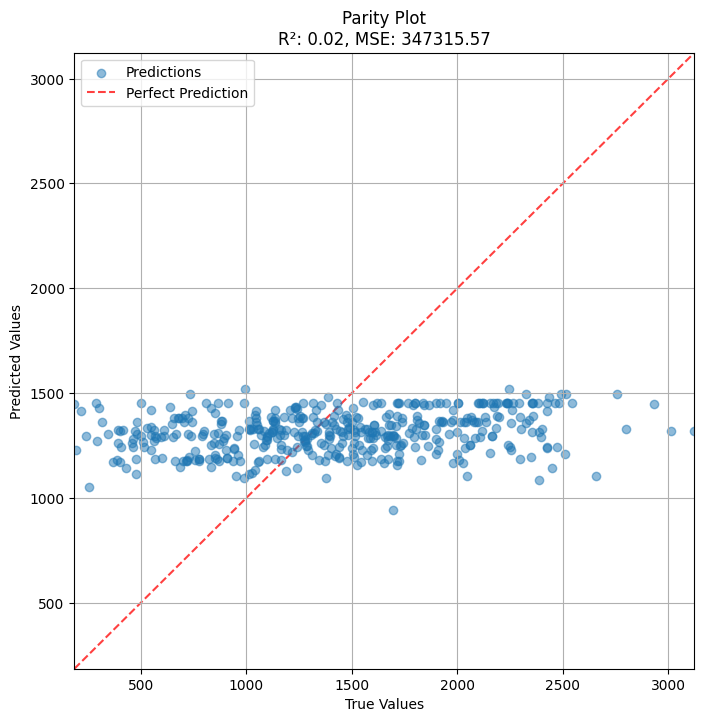

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5, label='Predictions')
lims = [min(y_test.min(), predictions.min()), max(y_test.max(), predictions.max())]
plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Prediction')

plt.xlim(lims)
plt.ylim(lims)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Parity Plot\nR²: {r2:.2f}, MSE: {mse:.2f}')
plt.legend()
plt.grid(True)
plt.show()
